
## SED fitting code

Demonstration of the capabilities of the SED_fitting module. The module can fit modified blackbody curves to 1D arrays of flux and frequency. T, N and beta are the free parameters but they can be fixed. Default ranges are used but custom limits for parmeter values can be given. It can also plot toy models with specified T,N,beta.


In [1]:
from fit import SED_fitting
import numpy as np
import pandas as pd

## Simple 1D fitting
Here is an example of fitting to arrays of flux and frequency, with some toy models overplotted for comparison.

  0%|          | 0/10000 [00:00<?, ?it/s]/home/tom/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 10000/10000 [00:07<00:00, 1289.58it/s]


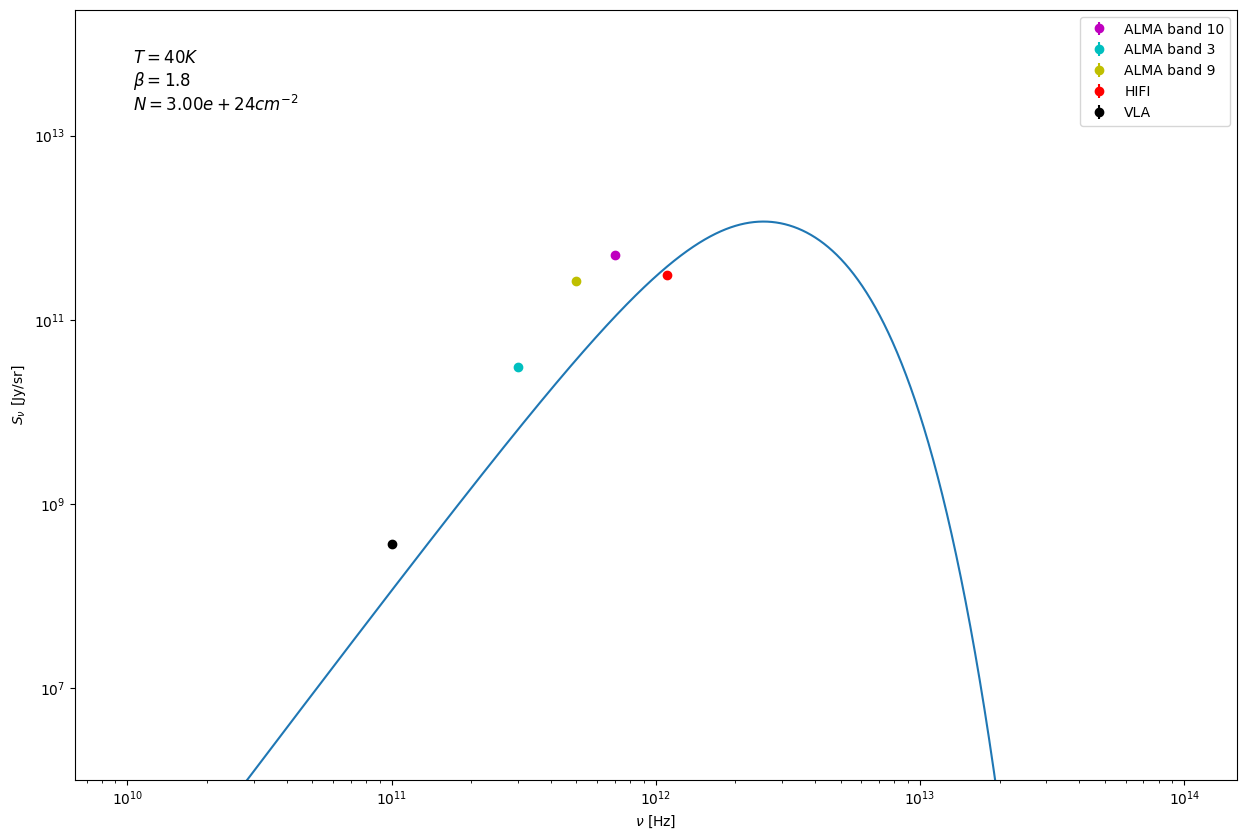

In [2]:
freqs=np.array([100,300,500,700,1100])*1e9 #Hz
fluxes=np.array([363,30434,260324,500006,306750])*1e6#Jy/sr
yerr=fluxes*0.1

labels=['VLA','ALMA band 3', 'ALMA band 9','ALMA band 10', 'HIFI']
colors=['k','c','y','m','r']
fit=[True,True,True,True,True]

dict = {'label':labels,
        'color':colors,
        'fit?':fit}
df=pd.DataFrame(dict)

init_T=40
init_beta=1.8
init_N=3.0e28 #si units
my_sed=SED_fitting(init_T,init_beta,init_N,df)
my_sed.fit_mod_blackbody('MCMC',fluxes=fluxes,frequencies=freqs,yerr=yerr) #need to work on the argument handling of this function for 1D case.
my_sed.plot_fit()

## Add toy model

Now we can add a toy model with T=50, Beta=2.0, N = 6e25 for comparison
 

    T beta                                 N label
0  30  2.0  609999999999999981167373713408.0  None
30 2.0 6.1e+29 None
30 2.0 6.1e+29


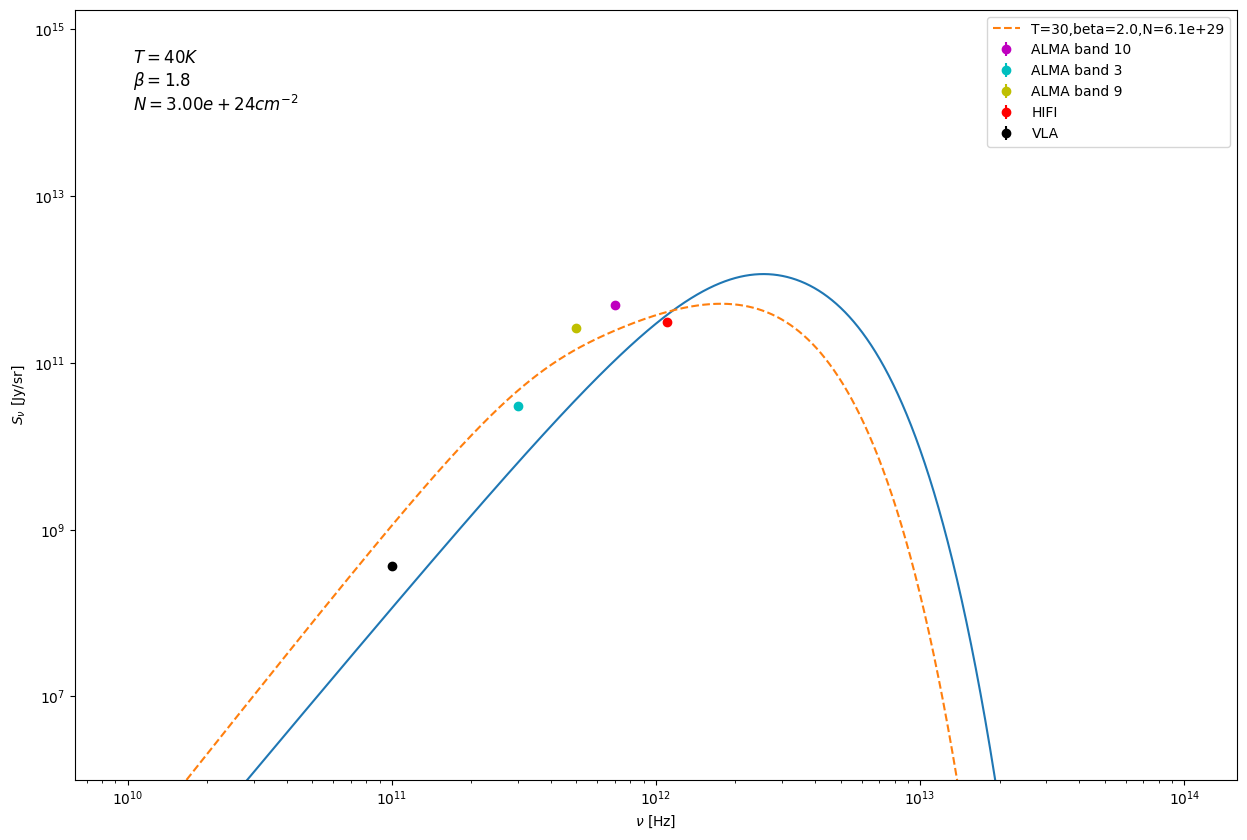

In [3]:
my_sed.add_toy_model(T=30,N=6.1e29,beta=2.0)  #need to add a fucntion to reset toy models also
my_sed.plot_fit(savefile='1D-example.png',toy_models=True)
#I have no idea why this is broken now.

## Fitting to flux in an aperture
or alternatively to a given pixel. What considerations should one make regarding the images? Smoothing regridding etc.....

## Interactive pixel selection.
How does the interactive selection work?

In [4]:
import pandas as pd
df=pd.read_csv('N_df.csv') # df containing columns of file paths and names.

my_paths=df['path']
my_files=df['file']

ref_image=my_paths[5]+my_files[5]
maps=[]
for i in range(len(my_files)):
    maps.append(my_paths[i]+my_files[i])

#initial guesses
init_T=40
init_beta=1.8
init_N=3.0e28 #si units
my_sed=SED_fitting(init_T,init_beta,init_N,df,T_range=[2.73,1000],beta_range=[1.0,3.0],N_range=[1e24,1e30],beta_fixed=False,N_fixed=False)
my_sed.interacive_plot(ref_image,maps)

type: [Errno 2] No such file or directory: 'N_df.csv'

## Fitting across maps
Fitting across common area of images to make maps of parameters.
